# Alternative splicing between PABPN1 mutants

In [1]:
###Load Packages

#Functions for polyA specific analysis (must be in same path)
from polyA_utils import *

#Packages for general column manipulation and statistics
import numpy as np
import pandas as pd
import csv
from tqdm import tqdm
from scipy import stats
import scipy.stats as sci
import pysam

#Packages for plotting
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("white")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Alternative splicing analyses for short read data were perfored using rmats. Load in results dataframes for visualization. Compare 4SA vs 4SD (4SD set to reference condition)

In [49]:
#Set datapath for DESeq2 analyses
path = "/Users/jacksongordon/Desktop/Neugebauer_Lab/Experiments/Exp27_PABPN1_mutants_diffExp/Data_processing/results/rmats/4SA_v_4SD/"

In [52]:
#load in results DFs
RI = pd.read_csv(path + "RI.MATS.JC.txt", sep = "\t")
Alt3 = pd.read_csv(path + "A3SS.MATS.JC.txt", sep = "\t")
Alt5 = pd.read_csv(path + "A5SS.MATS.JC.txt", sep = "\t")
SE = pd.read_csv(path + "SE.MATS.JC.txt", sep = "\t")
MXE = pd.read_csv(path + "MXE.MATS.JC.txt", sep = "\t")

Generate volcano plots to show differentially expressed genes with annotations

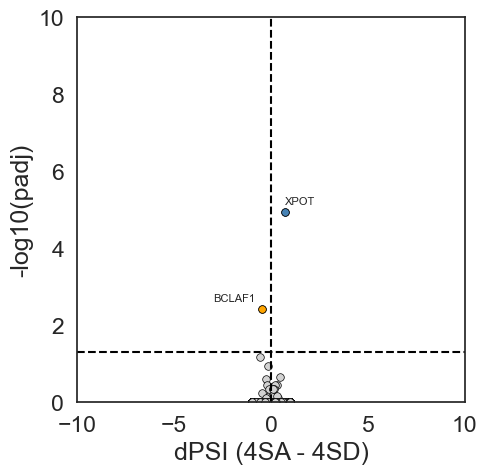

In [133]:
#Set whether to annotate
Annotate = True

#SE
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = SE.loc[(SE["IncLevelDifference"] >= 0) & (SE["FDR"] <= 0.05)]
downreg = SE.loc[(SE["IncLevelDifference"] <= 0) & (SE["FDR"] <= 0.05)]

sns.scatterplot(data = SE, x = SE["IncLevelDifference"], y = -np.log10(SE["FDR"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = upreg["IncLevelDifference"], y = -np.log10(upreg["FDR"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = downreg["IncLevelDifference"], y = -np.log10(downreg["FDR"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(0, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("dPSI (4SA - 4SD)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["geneSymbol"][i], ((upreg["IncLevelDifference"][i]), (-np.log10(upreg["FDR"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["geneSymbol"][i], ((downreg["IncLevelDifference"][i] - 2.5), (-np.log10(downreg["FDR"][i]) + 0.2)), fontsize = 8) 


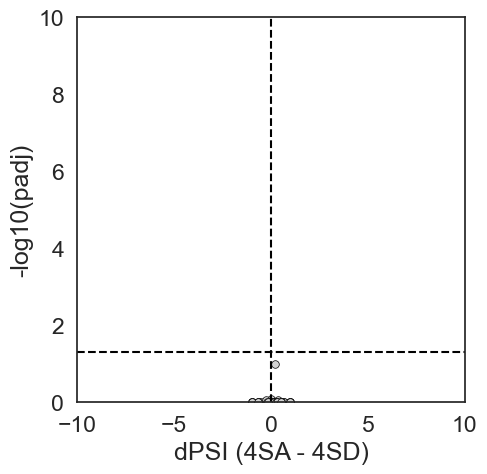

In [134]:
#Set whether to annotate
Annotate = True

#RI
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = RI.loc[(RI["IncLevelDifference"] >= 0) & (RI["FDR"] <= 0.05)]
downreg = RI.loc[(RI["IncLevelDifference"] <= 0) & (RI["FDR"] <= 0.05)]

sns.scatterplot(data = RI, x = RI["IncLevelDifference"], y = -np.log10(RI["FDR"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = upreg["IncLevelDifference"], y = -np.log10(upreg["FDR"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = downreg["IncLevelDifference"], y = -np.log10(downreg["FDR"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(0, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("dPSI (4SA - 4SD)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["geneSymbol"][i], ((upreg["IncLevelDifference"][i]), (-np.log10(upreg["FDR"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["geneSymbol"][i], ((downreg["IncLevelDifference"][i] - 2.5), (-np.log10(downreg["FDR"][i]) + 0.2)), fontsize = 8) 


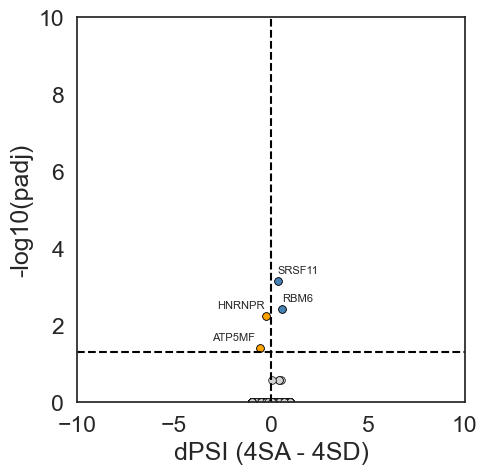

In [135]:
#Set whether to annotate
Annotate = True

#Alt3
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = Alt3.loc[(Alt3["IncLevelDifference"] >= 0) & (Alt3["FDR"] <= 0.05)]
downreg = Alt3.loc[(Alt3["IncLevelDifference"] <= 0) & (Alt3["FDR"] <= 0.05)]

sns.scatterplot(data = Alt3, x = Alt3["IncLevelDifference"], y = -np.log10(Alt3["FDR"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = upreg["IncLevelDifference"], y = -np.log10(upreg["FDR"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = downreg["IncLevelDifference"], y = -np.log10(downreg["FDR"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(0, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("dPSI (4SA - 4SD)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["geneSymbol"][i], ((upreg["IncLevelDifference"][i]), (-np.log10(upreg["FDR"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["geneSymbol"][i], ((downreg["IncLevelDifference"][i] - 2.5), (-np.log10(downreg["FDR"][i]) + 0.2)), fontsize = 8) 


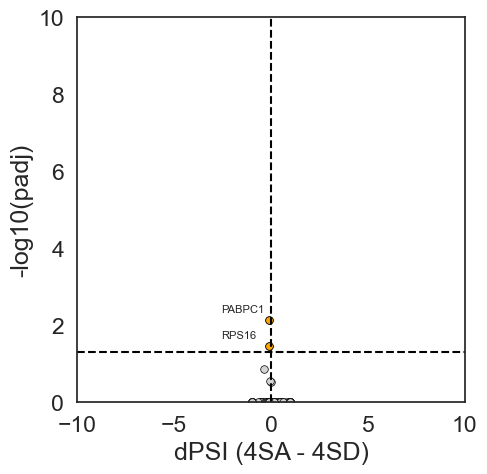

In [136]:
#Set whether to annotate
Annotate = True

#Alt5
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = Alt5.loc[(Alt5["IncLevelDifference"] >= 0) & (Alt5["FDR"] <= 0.05)]
downreg = Alt5.loc[(Alt5["IncLevelDifference"] <= 0) & (Alt5["FDR"] <= 0.05)]

sns.scatterplot(data = Alt5, x = Alt5["IncLevelDifference"], y = -np.log10(Alt5["FDR"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = upreg["IncLevelDifference"], y = -np.log10(upreg["FDR"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = downreg["IncLevelDifference"], y = -np.log10(downreg["FDR"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(0, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("dPSI (4SA - 4SD)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["geneSymbol"][i], ((upreg["IncLevelDifference"][i]), (-np.log10(upreg["FDR"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["geneSymbol"][i], ((downreg["IncLevelDifference"][i] - 2.5), (-np.log10(downreg["FDR"][i]) + 0.2)), fontsize = 8) 


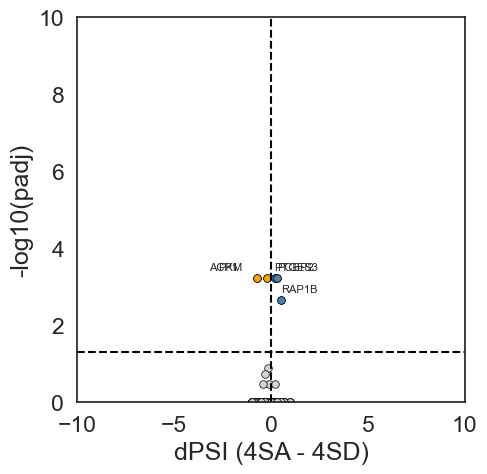

In [137]:
#Set whether to annotate
Annotate = True

#MXE
f, ax = plt.subplots(1,1, figsize = (5,5))
upreg = MXE.loc[(MXE["IncLevelDifference"] >= 0) & (MXE["FDR"] <= 0.05)]
downreg = MXE.loc[(MXE["IncLevelDifference"] <= 0) & (MXE["FDR"] <= 0.05)]

sns.scatterplot(data = MXE, x = MXE["IncLevelDifference"], y = -np.log10(MXE["FDR"]), s = 30, alpha = 1, color = "lightgrey", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = upreg, x = upreg["IncLevelDifference"], y = -np.log10(upreg["FDR"]), s = 30, alpha = 1, color = "steelblue", edgecolor = "black", linewidth = 0.5)
sns.scatterplot(data = downreg, x = downreg["IncLevelDifference"], y = -np.log10(downreg["FDR"]), s = 30, alpha = 1, color = "orange", edgecolor = "black", linewidth = 0.5)

ax.axvline(0, color = "black", linestyle = "--")
ax.axhline(-np.log10(0.05), color = "black", linestyle = "--")

ax.set_xlim(-10, 10)
ax.set_ylim(0, 10)
ax.set_xlabel("dPSI (4SA - 4SD)")
ax.set_ylabel("-log10(padj)")

#Annotations
if Annotate == True:
    for i in upreg.index: 
        plt.annotate(upreg["geneSymbol"][i], ((upreg["IncLevelDifference"][i]), (-np.log10(upreg["FDR"][i]) + 0.2)), fontsize = 8) 

    for i in downreg.index: 
        plt.annotate(downreg["geneSymbol"][i], ((downreg["IncLevelDifference"][i] - 2.5), (-np.log10(downreg["FDR"][i]) + 0.2)), fontsize = 8) 
